In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
# Melihat deskripsi dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [3]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Cek data yang nan
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
# nan_cols merupakan variabel yang menampung list dari feature yang terdapat nan value
nan_cols = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "pH", "sulphates"]

# Imputasi nilai nan dengan median
for col in nan_cols:
    df[col] = df[col].fillna(df[col].median())

# Cek kembali data yang nan
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Cek duplikasi data
df.duplicated().sum()

1168

In [7]:
# Drop duplikasi data
df=df.drop_duplicates()

In [8]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


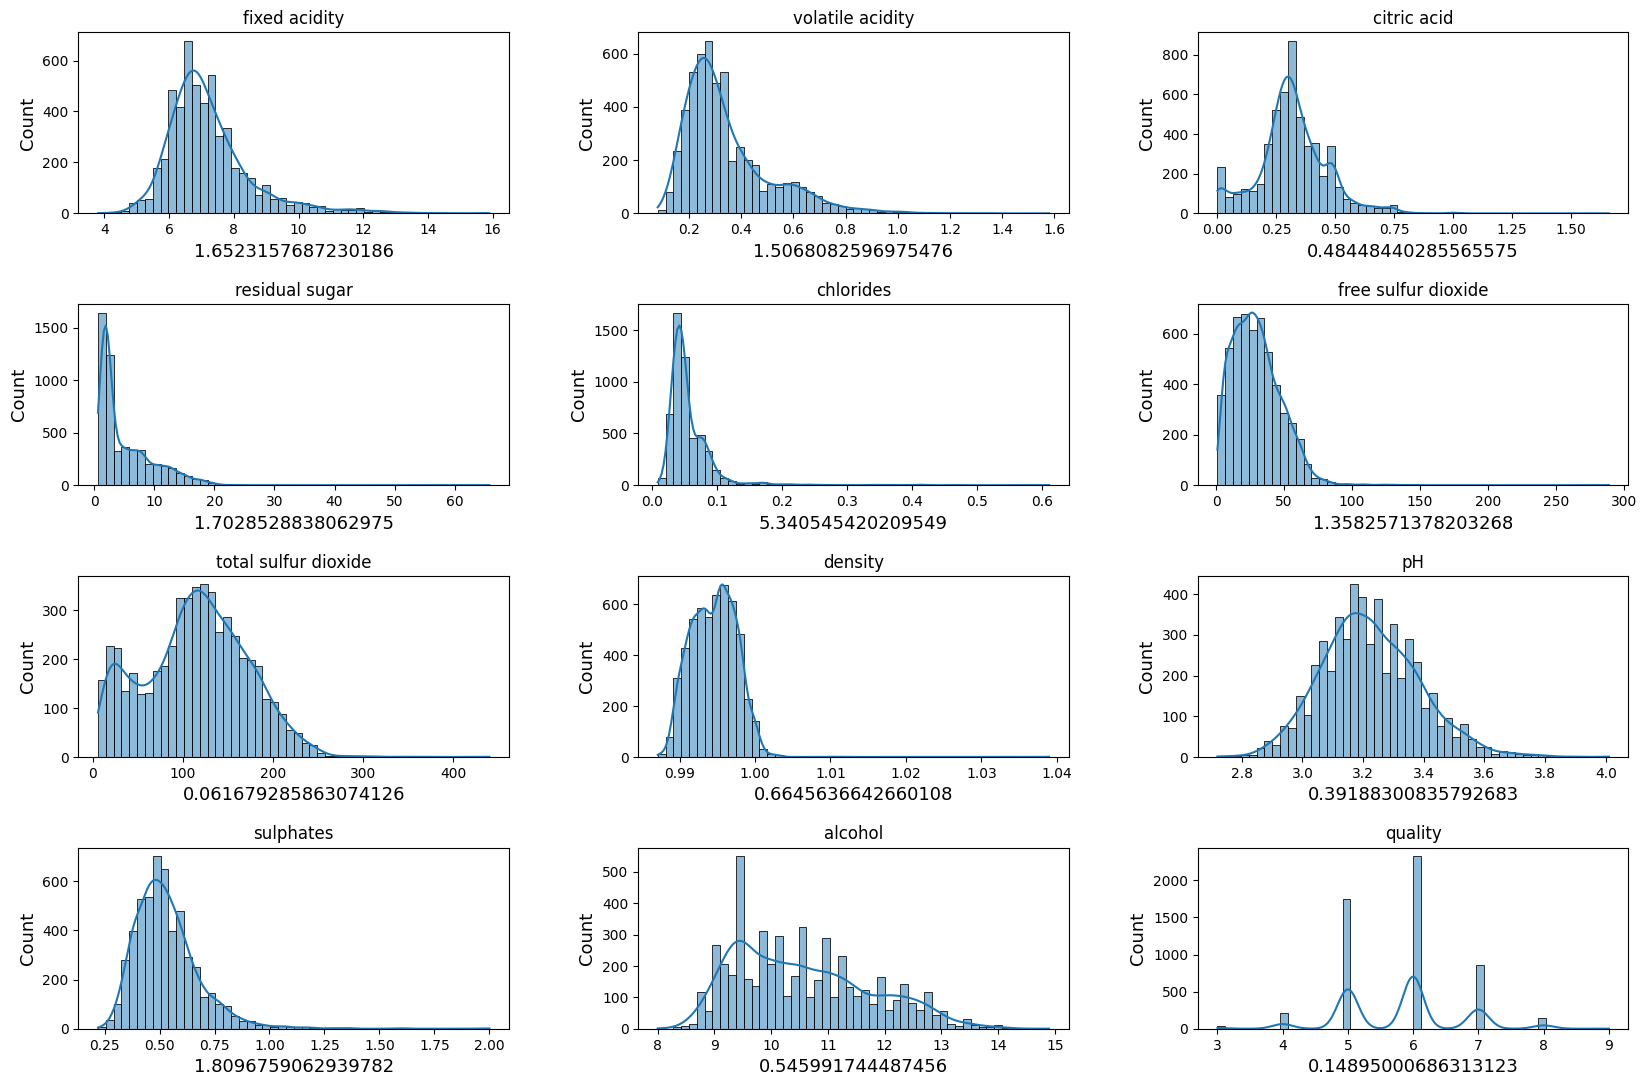

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns

# Cek skweness
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col)
    plt.xlabel(f'{skew(df[col])}', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50, kde=True)

In [10]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


/var/folders/nd/s6snn9l53zg5sthh_ttcvdpr0000gn/T/ipykernel_2837/3532573760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='flare', fliersize=1)
/var/folders/nd/s6snn9l53zg5sthh_ttcvdpr0000gn/T/ipykernel_2837/3532573760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='flare', fliersize=1)
/var/folders/nd/s6snn9l53zg5sthh_ttcvdpr0000gn/T/ipykernel_2837/3532573760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='flare', fliersize=1)
/var/folders/nd/s6snn9l53zg5

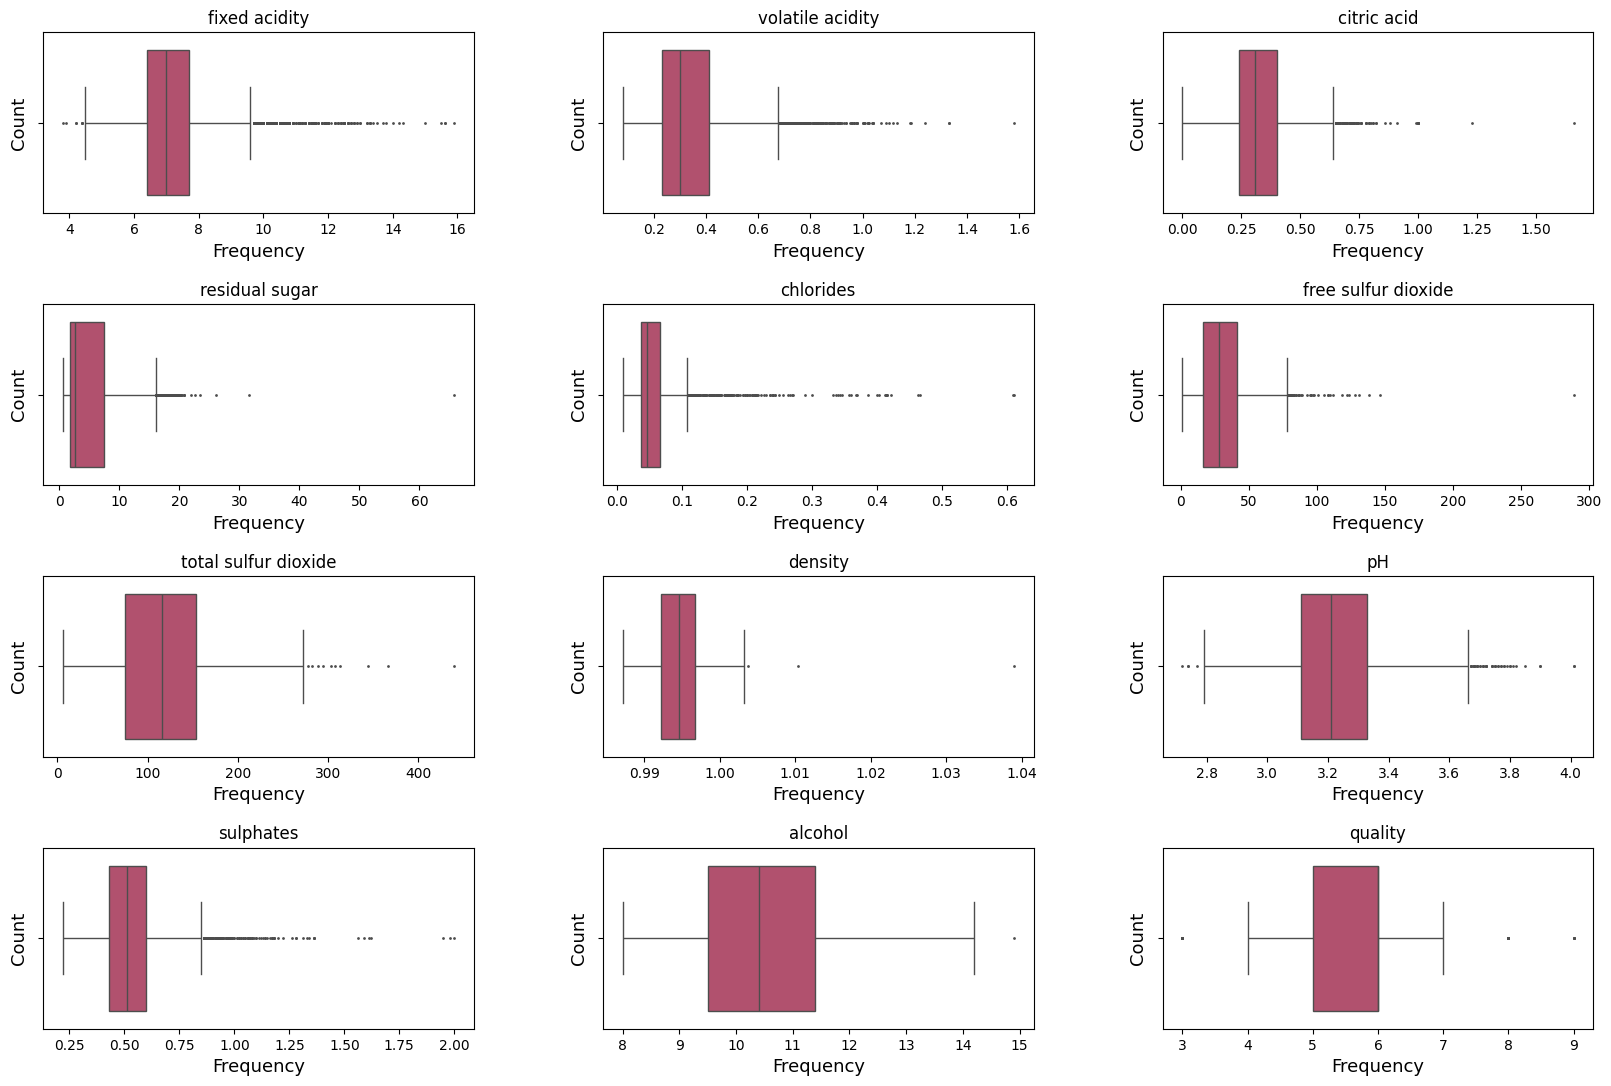

In [11]:
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

<Axes: >

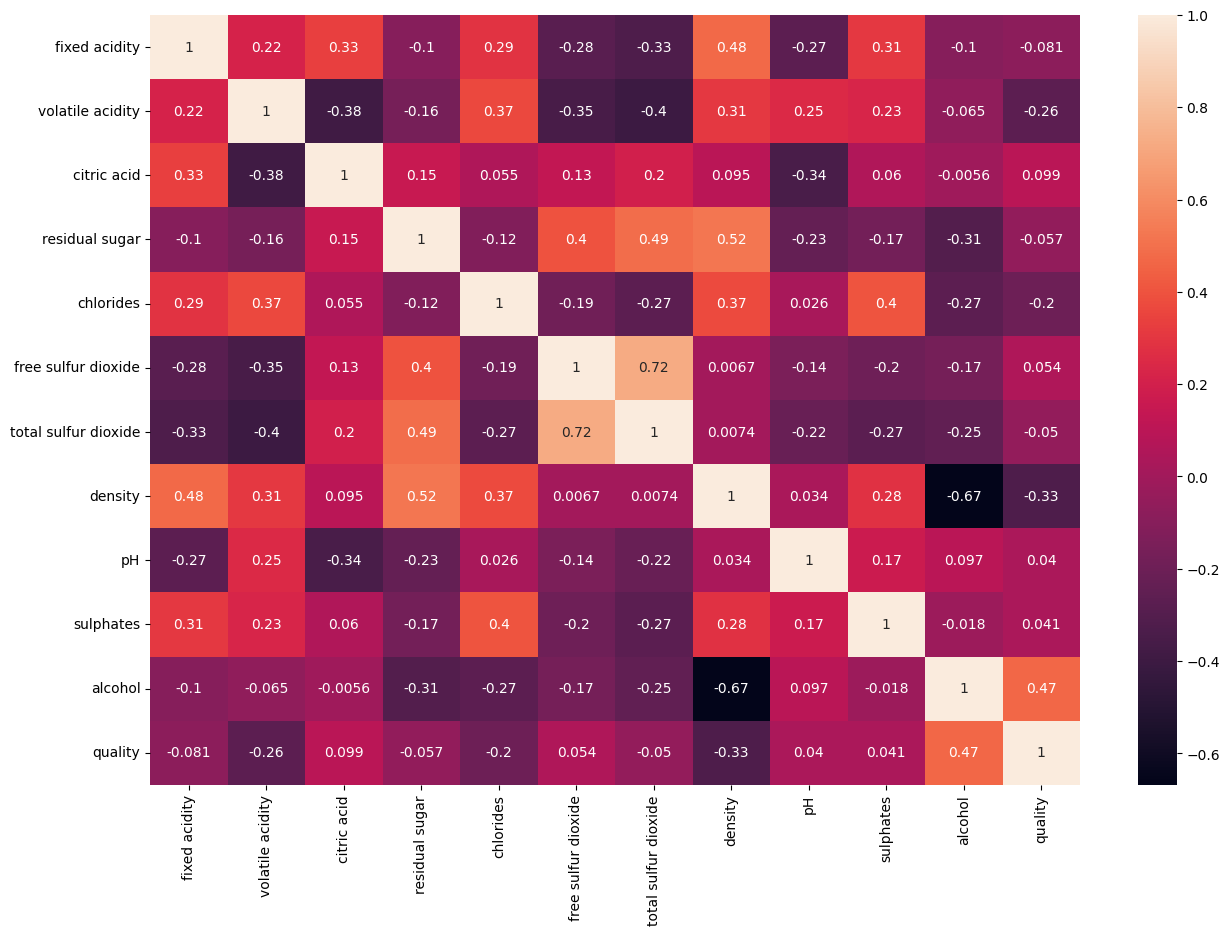

In [12]:
# Cek korelasi
plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(df[cols].corr(), annot=True)

In [13]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [14]:
# Drop feature quality
df.drop(columns=['quality', 'type'], inplace=True)
df.head()

/var/folders/nd/s6snn9l53zg5sthh_ttcvdpr0000gn/T/ipykernel_2837/3590909545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['quality', 'type'], inplace=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [15]:
df.to_csv("cleaned_data.csv", index=False)

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('alcohol', axis=1)
y = df['alcohol']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.preprocessing import MinMaxScaler
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler pada data latih dan transformasi data latih dan uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
# Inisialisasi model Multi Linear Regression
model = LinearRegression()

In [19]:
# Latih model pada data latih
model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test_scaled)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluasi model menggunakan Mean Squared Error (MSE) dan R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Menampilkan koefisien dan intercept
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 0.28715583263135747
R-squared: 0.7863116038349307
Koefisien: [  6.55486707   1.75279028   0.93723303  13.90498867  -0.36204245
   0.10981689  -1.79512044 -31.19898178   3.83810684   2.59394497]
Intercept: 10.190944019645674


In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

/Users/muhammadreesarosyid/tensorflow-test/env/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


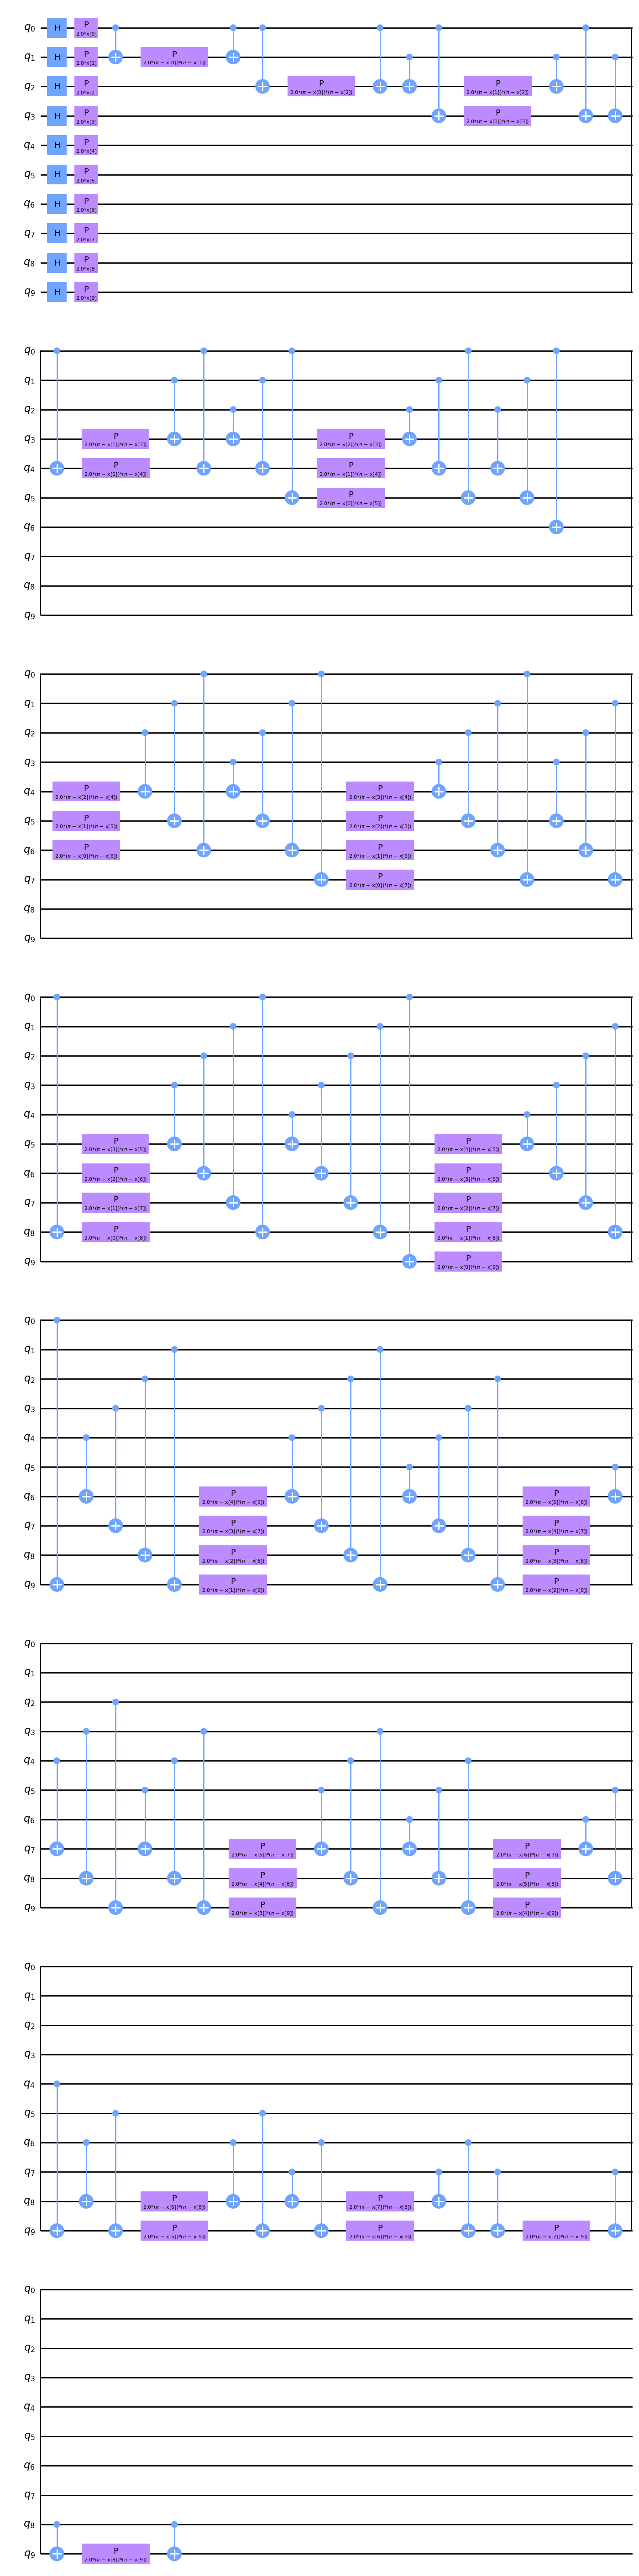

In [23]:
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC

features_map = ZZFeatureMap(feature_dimension=10, reps=1)
features_map.decompose().draw(output="mpl", fold=20)

/Users/muhammadreesarosyid/tensorflow-test/env/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


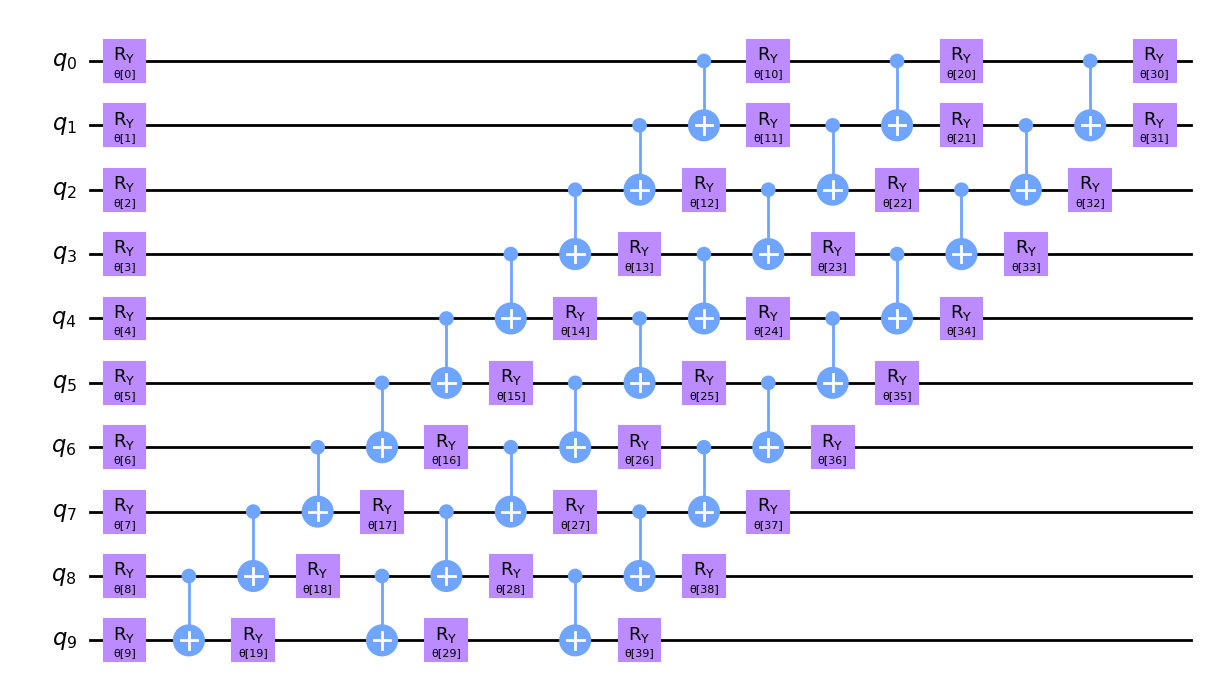

In [24]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=10, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [25]:
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

/var/folders/nd/s6snn9l53zg5sthh_ttcvdpr0000gn/T/ipykernel_2837/2236672762.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


In [26]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [27]:
import time
vqc = VQC(
    sampler=sampler,
    feature_map=features_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train_scaled, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

AttributeError: 'Series' object has no attribute 'reshape'